In [28]:
# Import dependencies
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_palette("muted")

# Store file path
csv_path="Resources/Border_Crossing_Entry_Data.csv"

# Read the csv file
data_df = pd.read_csv(csv_path)
data_df

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)
...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01)
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78)
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49)
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67)


In [2]:
# List the colums in the dataset
data_df.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value',
       'Location'],
      dtype='object')

In [3]:
# Reduce the dataset to the columns needed
reduced_df=data_df[['Port Name','State', 'Border', 'Date', 'Measure', 'Value', 'Location']]
reduced_df

,Port Name,State,Border,Date,Measure,Value,Location
0,Calexico East,California,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)
...,...,...,...,...,...,...,...
346728,Norton,Vermont,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01)
346729,Columbus,New Mexico,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78)
346730,Hansboro,North Dakota,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49)
346731,Calexico East,California,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67)


In [4]:
reduced_df.dtypes

Port Name    object
State        object
Border       object
Date         object
Measure      object
Value         int64
Location     object
dtype: object

In [5]:
reduced_df['Date'] = pd.to_datetime(reduced_df['Date'])
reduced_df.dtypes

C:\Users\sarap\AppData\Local\Temp\ipykernel_13228\1124241558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['Date'] = pd.to_datetime(reduced_df['Date'])


Port Name            object
State                object
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Location             object
dtype: object

In [6]:

reduced_df['Year']= reduced_df['Date'].dt.year
reduced_df['Month']= reduced_df['Date'].dt.month
reduced_df['Day']= reduced_df['Date'].dt.day
reduced_df

,Port Name,State,Border,Date,Measure,Value,Location,Year,Month,Day
0,Calexico East,California,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,1
1,Van Buren,Maine,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,1
2,Otay Mesa,California,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,1
3,Nogales,Arizona,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,1
4,Trout River,New York,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,1
...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,US-Canada Border,1996-01-01,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1,1
346729,Columbus,New Mexico,US-Mexico Border,1996-01-01,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1,1
346730,Hansboro,North Dakota,US-Canada Border,1996-01-01,Rail Containers Full,0,POINT (-99.35 49),1996,1,1
346731,Calexico East,California,US-Mexico Border,1996-01-01,Buses,0,POINT (-115.39 32.67),1996,1,1


In [7]:
# Split the Location column
reduced_df[['Point', 'Longitude', 'Latitude']] = reduced_df['Location'].str.split(" ", expand = True)
reduced_df

,Port Name,State,Border,Date,Measure,Value,Location,Year,Month,Day,Point,Longitude,Latitude
0,Calexico East,California,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,1,POINT,(-115.48433000000001,32.67524)
1,Van Buren,Maine,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,1,POINT,(-67.94271,47.16207)
2,Otay Mesa,California,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,1,POINT,(-117.05333,32.57333)
3,Nogales,Arizona,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,1,POINT,(-110.93361,31.340279999999996)
4,Trout River,New York,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,1,POINT,(-73.44253,44.990010000000005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,US-Canada Border,1996-01-01,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1,1,POINT,(-71.79,45.01)
346729,Columbus,New Mexico,US-Mexico Border,1996-01-01,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1,1,POINT,(-107.63,31.78)
346730,Hansboro,North Dakota,US-Canada Border,1996-01-01,Rail Containers Full,0,POINT (-99.35 49),1996,1,1,POINT,(-99.35,49)
346731,Calexico East,California,US-Mexico Border,1996-01-01,Buses,0,POINT (-115.39 32.67),1996,1,1,POINT,(-115.39,32.67)


In [8]:
# Remove () from Latitude and Longitude columns:

reduced_df['Longitude'] = reduced_df['Longitude'].str.replace('(', '')
reduced_df['Latitude'] = reduced_df['Latitude'].str.replace(')', '')
reduced_df

C:\Users\sarap\AppData\Local\Temp\ipykernel_13228\2652793413.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reduced_df['Longitude'] = reduced_df['Longitude'].str.replace('(', '')
C:\Users\sarap\AppData\Local\Temp\ipykernel_13228\2652793413.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reduced_df['Latitude'] = reduced_df['Latitude'].str.replace(')', '')


,Port Name,State,Border,Date,Measure,Value,Location,Year,Month,Day,Point,Longitude,Latitude
0,Calexico East,California,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,1,POINT,-115.48433000000001,32.67524
1,Van Buren,Maine,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,1,POINT,-67.94271,47.16207
2,Otay Mesa,California,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,1,POINT,-117.05333,32.57333
3,Nogales,Arizona,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,1,POINT,-110.93361,31.340279999999996
4,Trout River,New York,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,1,POINT,-73.44253,44.990010000000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,US-Canada Border,1996-01-01,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1,1,POINT,-71.79,45.01
346729,Columbus,New Mexico,US-Mexico Border,1996-01-01,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1,1,POINT,-107.63,31.78
346730,Hansboro,North Dakota,US-Canada Border,1996-01-01,Rail Containers Full,0,POINT (-99.35 49),1996,1,1,POINT,-99.35,49
346731,Calexico East,California,US-Mexico Border,1996-01-01,Buses,0,POINT (-115.39 32.67),1996,1,1,POINT,-115.39,32.67


In [9]:
# Reduce the dataset to the columns needed

reduced1_df = reduced_df[['Port Name','State', 'Border', 'Year', 'Month', 'Measure', 'Value', 'Longitude', 'Latitude']]
reduced1_df

,Port Name,State,Border,Year,Month,Measure,Value,Longitude,Latitude
0,Calexico East,California,US-Mexico Border,2019,3,Trucks,34447,-115.48433000000001,32.67524
1,Van Buren,Maine,US-Canada Border,2019,3,Rail Containers Full,428,-67.94271,47.16207
2,Otay Mesa,California,US-Mexico Border,2019,3,Trucks,81217,-117.05333,32.57333
3,Nogales,Arizona,US-Mexico Border,2019,3,Trains,62,-110.93361,31.340279999999996
4,Trout River,New York,US-Canada Border,2019,3,Personal Vehicle Passengers,16377,-73.44253,44.990010000000005
...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,US-Canada Border,1996,1,Personal Vehicle Passengers,9119,-71.79,45.01
346729,Columbus,New Mexico,US-Mexico Border,1996,1,Personal Vehicles,29486,-107.63,31.78
346730,Hansboro,North Dakota,US-Canada Border,1996,1,Rail Containers Full,0,-99.35,49
346731,Calexico East,California,US-Mexico Border,1996,1,Buses,0,-115.39,32.67


In [10]:
reduced2_df = reduced1_df.loc[(reduced1_df["Year"] >= 2009) & (reduced1_df["Year"] <= 2018)]
reduced2_df

,Port Name,State,Border,Year,Month,Measure,Value,Longitude,Latitude
2364,Van Buren,Maine,US-Canada Border,2018,12,Trucks,1204,-67.94271,47.16207
2365,Maida,North Dakota,US-Canada Border,2018,12,Trucks,170,-98.36953,48.98568
2366,Douglas,Arizona,US-Mexico Border,2018,12,Buses,210,-109.54472,31.344439999999995
2367,Presidio,Texas,US-Mexico Border,2018,12,Bus Passengers,238,-104.37167,29.56056
2368,Anacortes,Washington,US-Canada Border,2018,12,Personal Vehicle Passengers,5350,-122.61738999999999,48.49988
...,...,...,...,...,...,...,...,...,...
146964,Sherwood,North Dakota,US-Canada Border,2009,1,Train Passengers,0,-101.63,49
146965,Progreso,Texas,US-Mexico Border,2009,1,Buses,7,-97.95,26.06
146966,Friday Harbor,Washington,US-Canada Border,2009,1,Truck Containers Full,0,-123.01,48.54
146967,Port Huron,Michigan,US-Canada Border,2009,1,Pedestrians,0,-82.42,43


In [11]:
reduced2_df['Month'] = reduced2_df['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
reduced2_df

C:\Users\sarap\AppData\Local\Temp\ipykernel_13228\809801810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced2_df['Month'] = reduced2_df['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


,Port Name,State,Border,Year,Month,Measure,Value,Longitude,Latitude
2364,Van Buren,Maine,US-Canada Border,2018,Dec,Trucks,1204,-67.94271,47.16207
2365,Maida,North Dakota,US-Canada Border,2018,Dec,Trucks,170,-98.36953,48.98568
2366,Douglas,Arizona,US-Mexico Border,2018,Dec,Buses,210,-109.54472,31.344439999999995
2367,Presidio,Texas,US-Mexico Border,2018,Dec,Bus Passengers,238,-104.37167,29.56056
2368,Anacortes,Washington,US-Canada Border,2018,Dec,Personal Vehicle Passengers,5350,-122.61738999999999,48.49988
...,...,...,...,...,...,...,...,...,...
146964,Sherwood,North Dakota,US-Canada Border,2009,Jan,Train Passengers,0,-101.63,49
146965,Progreso,Texas,US-Mexico Border,2009,Jan,Buses,7,-97.95,26.06
146966,Friday Harbor,Washington,US-Canada Border,2009,Jan,Truck Containers Full,0,-123.01,48.54
146967,Port Huron,Michigan,US-Canada Border,2009,Jan,Pedestrians,0,-82.42,43


In [12]:
final_df = reduced2_df.reset_index(drop=True).dropna()
final_df

,Port Name,State,Border,Year,Month,Measure,Value,Longitude,Latitude
0,Van Buren,Maine,US-Canada Border,2018,Dec,Trucks,1204,-67.94271,47.16207
1,Maida,North Dakota,US-Canada Border,2018,Dec,Trucks,170,-98.36953,48.98568
2,Douglas,Arizona,US-Mexico Border,2018,Dec,Buses,210,-109.54472,31.344439999999995
3,Presidio,Texas,US-Mexico Border,2018,Dec,Bus Passengers,238,-104.37167,29.56056
4,Anacortes,Washington,US-Canada Border,2018,Dec,Personal Vehicle Passengers,5350,-122.61738999999999,48.49988
...,...,...,...,...,...,...,...,...,...
144600,Sherwood,North Dakota,US-Canada Border,2009,Jan,Train Passengers,0,-101.63,49
144601,Progreso,Texas,US-Mexico Border,2009,Jan,Buses,7,-97.95,26.06
144602,Friday Harbor,Washington,US-Canada Border,2009,Jan,Truck Containers Full,0,-123.01,48.54
144603,Port Huron,Michigan,US-Canada Border,2009,Jan,Pedestrians,0,-82.42,43


In [14]:
# Export the CSV for final data
final_df.to_csv('Border_Crossing_Final_Data.csv')

In [15]:
final_df["Measure"].value_counts()

Personal Vehicles              13248
Personal Vehicle Passengers    13228
Trucks                         12921
Truck Containers Empty         12824
Truck Containers Full          12771
Buses                          12000
Bus Passengers                 11998
Pedestrians                    11879
Trains                         10971
Rail Containers Empty          10947
Rail Containers Full           10923
Train Passengers               10895
Name: Measure, dtype: int64

In [16]:
# Which is the busiest border?

# Dataframe containing only number of people

people_df = final_df.loc[(final_df["Measure"] == 'Personal Vehicle Passengers') | 
                         (final_df["Measure"] == 'Bus Passengers') | 
                         (final_df["Measure"] == 'Pedestrians') | 
                         (final_df["Measure"] == 'Train Passengers')]
people_df

,Port Name,State,Border,Year,Month,Measure,Value,Longitude,Latitude
3,Presidio,Texas,US-Mexico Border,2018,Dec,Bus Passengers,238,-104.37167,29.56056
4,Anacortes,Washington,US-Canada Border,2018,Dec,Personal Vehicle Passengers,5350,-122.61738999999999,48.49988
7,Columbus,New Mexico,US-Mexico Border,2018,Dec,Pedestrians,24168,-107.63944,31.827499999999997
12,Lukeville,Arizona,US-Mexico Border,2018,Dec,Personal Vehicle Passengers,56937,-112.81500000000001,31.8825
15,Highgate Springs-Alburg,Vermont,US-Canada Border,2018,Dec,Personal Vehicle Passengers,63798,-73.10583,44.979440000000004
...,...,...,...,...,...,...,...,...,...
144594,Port Angeles,Washington,US-Canada Border,2009,Jan,Pedestrians,0,-123.43,48.12
144595,Wildhorse,Montana,US-Canada Border,2009,Jan,Train Passengers,0,-110.22,49
144599,Sasabe,Arizona,US-Mexico Border,2009,Jan,Pedestrians,90,-111.54,31.48
144600,Sherwood,North Dakota,US-Canada Border,2009,Jan,Train Passengers,0,-101.63,49


In [17]:
# Dataframe containing only number of vehicles

vehicles_df = final_df.loc[(final_df["Measure"] == 'Personal Vehicles') | 
                         (final_df["Measure"] == 'Trucks') | 
                         (final_df["Measure"] == 'Truck Containers Empty') | 
                         (final_df["Measure"] == 'Truck Containers Full') | 
                         (final_df["Measure"] == 'Buses') | 
                         (final_df["Measure"] == 'Trains') | 
                         (final_df["Measure"] == 'Rail Containers Empty') | 
                         (final_df["Measure"] == 'Rail Containers Full')]
vehicles_df

,Port Name,State,Border,Year,Month,Measure,Value,Longitude,Latitude
0,Van Buren,Maine,US-Canada Border,2018,Dec,Trucks,1204,-67.94271,47.16207
1,Maida,North Dakota,US-Canada Border,2018,Dec,Trucks,170,-98.36953,48.98568
2,Douglas,Arizona,US-Mexico Border,2018,Dec,Buses,210,-109.54472,31.344439999999995
5,Brownsville,Texas,US-Mexico Border,2018,Dec,Truck Containers Full,9871,-97.49722,25.90139
6,Maida,North Dakota,US-Canada Border,2018,Dec,Truck Containers Empty,162,-98.36953,48.98568
...,...,...,...,...,...,...,...,...,...
144597,Danville,Washington,US-Canada Border,2009,Jan,Trucks,8,-118.50000000000001,49
144598,Oroville,Washington,US-Canada Border,2009,Jan,Rail Containers Empty,0,-119.46,49
144601,Progreso,Texas,US-Mexico Border,2009,Jan,Buses,7,-97.95,26.06
144602,Friday Harbor,Washington,US-Canada Border,2009,Jan,Truck Containers Full,0,-123.01,48.54


In [45]:
people1_df = people_df.groupby(people_df["Border"])["Value"].sum().reset_index()
people1_df

,Border,Value
0,US-Canada Border,586213971
1,US-Mexico Border,1752608385


In [ ]:
# # Set x axis and tick locations based on filtered data from previous chart
# x_axis = np.arange(len(people1_df))

# # Create a bar chart based on the above data
# figure1 = plt.bar(x_axis, people1_df, align="center")

# # Set the tick locations and create ticks for bar chart's x-axis
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, people1_df.index, rotation="horizontal", fontsize=8)

# # Set x and y limits
# plt.xlim(-1, len(x_axis))
# plt.ylim(0, max(people1_df)+100000000)

# # Add title and labels to the chart
# plt.title("Number of People crossing US border")
# plt.xlabel("Border")
# plt.ylabel("Number of People")

# # Show the chart
# plt.tight_layout()
# plt.show()

c:\Users\sarap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


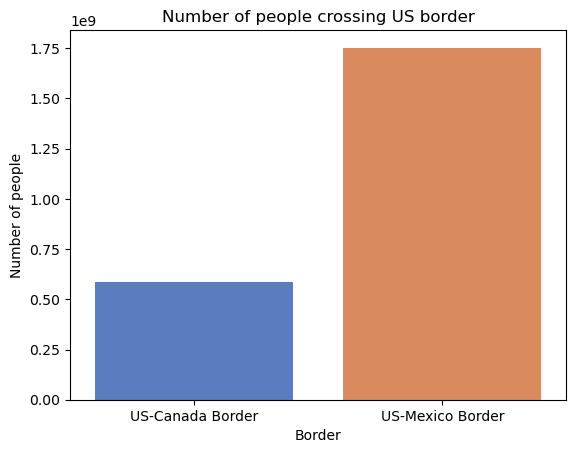

In [64]:

Fig1 = sns.barplot(people1_df["Border"], people1_df["Value"])
scale_y = 1e6
Fig1.set_xlabel("Border")
Fig1.set_ylabel("Number of people")
Fig1.set_title("Number of people crossing US border")
plt.show()